In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA


In [112]:
data=pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [113]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [114]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

In [115]:
data=data.fillna(0)
data.isna().sum().sum()

0

In [116]:
data = data.drop("CUST_ID", axis=1)

In [127]:
#scalling and normalizing the data
from scipy.stats import zscore

data_scaled=data.apply(zscore)
data_scaled=normalize(data_scaled)

In [128]:
#Applying PCA
pca = PCA(n_components = 2)
pca.fit(data_scaled)

PCA(n_components=2)

In [129]:
data_p = pd.DataFrame(data_scaled, columns=data.columns)

hierarchical clustering :

In [204]:
#Cluster our data by choosing 5 as number of clusters
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data_p)

data_p['Agglo_clusters_labels'] = clust_labels

In [205]:
print("Agglomerative labels")
data_p['Agglo_clusters_labels'].value_counts()

Agglomerative labels


0    3424
2    2397
4    1387
1     873
3     869
Name: Agglo_clusters_labels, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

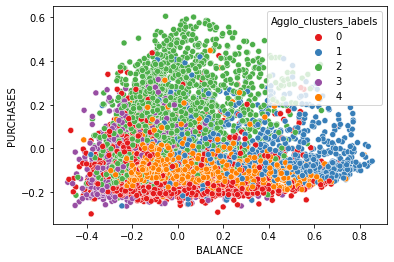

In [206]:
import seaborn as sns 
sns.set_palette('Set2')
sns.scatterplot(data_p['BALANCE'],data_p['PURCHASES'],hue=data_p['Agglo_clusters_labels'],palette='Set1')

In [223]:
#Cluster our data by choosing 3 as number of clusters
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data_p)

data_p['Agglo_clusters_labels'] = clust_labels

In [224]:
print("Agglomerative labels")
data_p['Agglo_clusters_labels'].value_counts()

Agglomerative labels


1    3424
2    3266
0    2260
Name: Agglo_clusters_labels, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

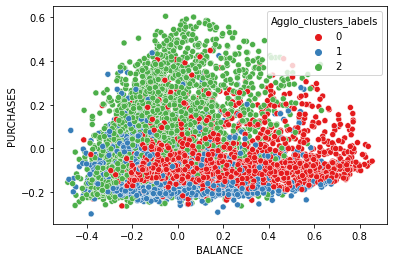

In [225]:
import seaborn as sns 
sns.set_palette('Set2')
sns.scatterplot(data_p['BALANCE'],data_p['PURCHASES'],hue=data_p['Agglo_clusters_labels'],palette='Set1')

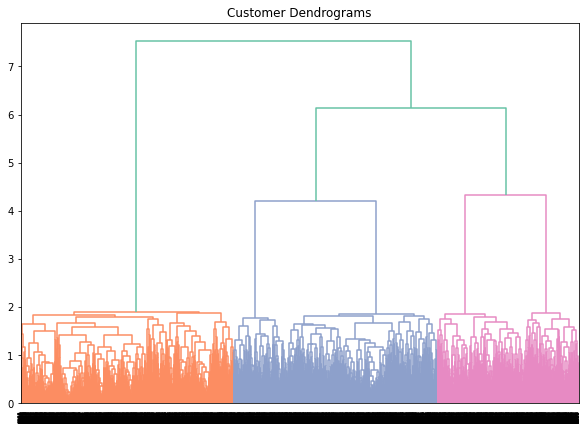

In [226]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data_p, method="complete"))

hierarchical clustering :

In [20]:
data_imputed = pd.DataFrame(data_scaled, columns=data.columns)

In [21]:
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_imputed))

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)

preds = pd.Series(AgglomerativeClustering(n_clusters = 5,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

K_Means :

In [210]:
kmeans=KMeans(n_clusters=5, random_state=0) #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data_p)

KMeans(n_clusters=5, random_state=0)

In [211]:
label=pd.DataFrame(kmeans.labels_)
data_p['k_means_labels']=label
data_p['k_means_labels'].value_counts()

1    3424
2    2397
3    1387
4     873
0     869
Name: k_means_labels, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

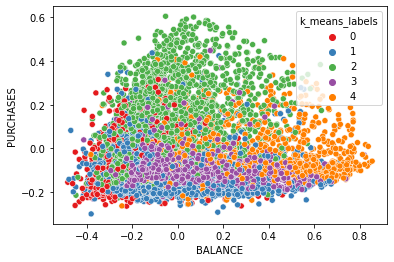

In [212]:
import seaborn as sns 
sns.set_palette('Set2')
sns.scatterplot(data_p['BALANCE'],data_p['PURCHASES'],hue=data_p['k_means_labels'],palette='Set1')

In [160]:
sse = []
K=range(1,15)
for i in K:
    km=KMeans(n_clusters=i)
    km=km.fit(data_p)
    sse.append(km.inertia_)   

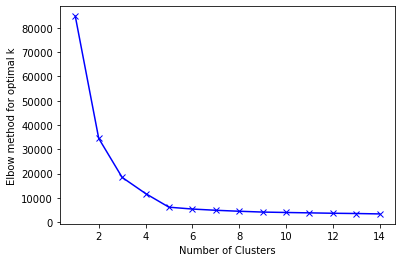

In [161]:
plt.figure()
plt.plot(K,sse, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum-of-Squares")
plt.ylabel("Elbow method for optimal k")
plt.show()

In [216]:
kmeans=KMeans(n_clusters=3, random_state=0) #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data_p)

KMeans(n_clusters=3, random_state=0)

In [217]:
label=pd.DataFrame(kmeans.labels_)
data_p['k_means_labels']=label
data_p['k_means_labels'].value_counts()

0    4139
1    3424
2    1387
Name: k_means_labels, dtype: int64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

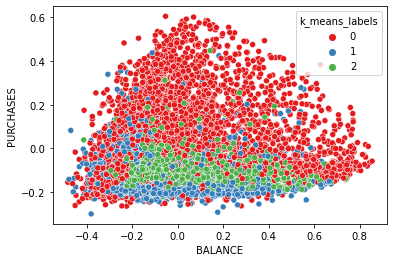

In [218]:
import seaborn as sns 
sns.set_palette('Set2')
sns.scatterplot(data_p['BALANCE'],data_p['PURCHASES'],hue=data_p['k_means_labels'],palette='Set1')